# Import labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [2]:
'Read dataset'
df=pd.read_csv('uber.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Exploratory Data Analysis

In [29]:
df.shape

(1154, 9)

In [3]:
'Information about dataset'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
'Total No of columns in dataset'
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [5]:
'Change column names'
df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'DISTINATION', 'MILES', 'PURPOSE']

In [6]:
'check null Values in dataset'
df.isnull().sum()

START_DATE       0
END_DATE         1
CATEGORY         1
START            1
DISTINATION      1
MILES            0
PURPOSE        503
dtype: int64

In [7]:
'check numerical parameter of dataset'
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
'Percent of null values in perticular column'
df.isnull().sum() * 100 / len(df)

START_DATE      0.000000
END_DATE        0.086505
CATEGORY        0.086505
START           0.086505
DISTINATION     0.086505
MILES           0.000000
PURPOSE        43.512111
dtype: float64

In [9]:
df.PURPOSE.value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [10]:
'Filling null values'
df['PURPOSE'].fillna(('Meeting'),inplace=True)

In [11]:
'searching for duplicates value'
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,DISTINATION,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [12]:
'Drop duplicates value'
df.drop_duplicates(inplace=True)

In [13]:
'Delete null values according to row'
df=df.dropna(axis=0)

In [14]:
df.isnull().sum()

START_DATE     0
END_DATE       0
CATEGORY       0
START          0
DISTINATION    0
MILES          0
PURPOSE        0
dtype: int64

In [15]:
'Converting date column from float to datetime'
df['START_DATE']=pd.to_datetime(df['START_DATE'])
df['END_DATE']=pd.to_datetime(df['END_DATE'])

C:\Users\ANKUSH_NAIK\AppData\Local\Temp\ipykernel_8524\2531600186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['END_DATE']=pd.to_datetime(df['END_DATE'])


# Visualization with Matplotlib and Seaborn


Text(0.5, 1.0, 'Perpose vs Start_point ')

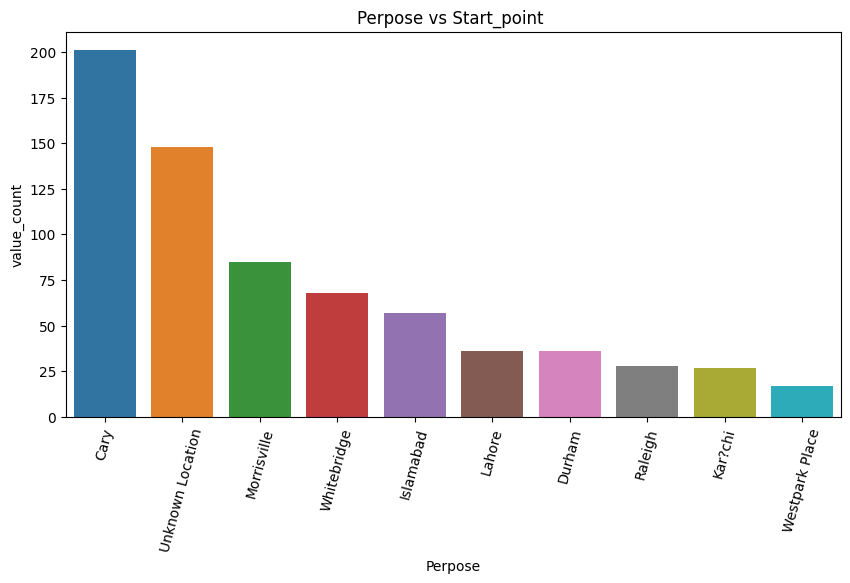

In [16]:
'create barchart perpose vs start'
st_label=df['START'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
plt.xticks(rotation=75)
sns.barplot(x=st_label.index,y=st_label)
plt.ylabel('value_count')
plt.xlabel('Perpose')
plt.title('Perpose vs Start_point ')

Text(0.5, 1.0, 'Most visited country')

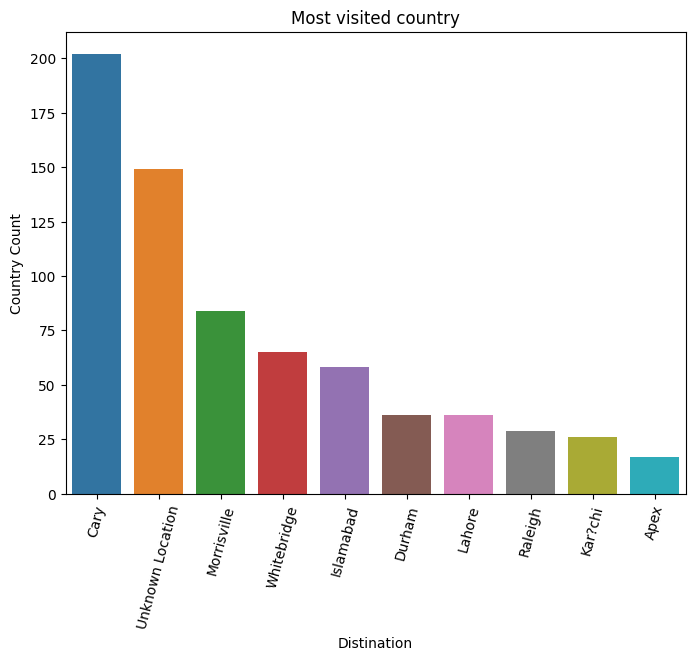

In [17]:
'create bar chart for most vistited distination point'
distn_l=df['DISTINATION'].value_counts().nlargest(10)
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
sns.barplot(x=distn_l.index,y=distn_l)
plt.xlabel('Distination')
plt.ylabel('Country Count')
plt.title('Most visited country')

In [18]:
'Creating dictonary and adding miles range for graphical representation'

miles_dict={}
for i in df['MILES']:
    if i<10:
        if '0-10 miles' not in miles_dict:
            miles_dict['0-10 miles'] = [i] # here 0-10 will act as a key and i will fill the values from miles column
        else:
            miles_dict['0-10 miles'].append(i)
    elif i>=10 and i<20:
        if '10-20 miles' not in miles_dict:
            miles_dict['10-20 miles']=[i]
        else:
            miles_dict['10-20 miles'].append(i)
    elif i>=20 and i<30:
        if '20-30 miles' not in miles_dict:
            miles_dict['20-30 miles']=[i]
        else:
            miles_dict['20-30 miles'].append(i)
    elif i>=30 and i<40:
        if '30-40 miles' not in miles_dict:
            miles_dict['30-40 miles']=[i]
        else:
            miles_dict['30-40 miles'].append(i)
    elif i>=40 and i<50:
        if '40-50 miles' not in miles_dict:
            miles_dict['40-50 miles']=[i]
        else: 
            miles_dict['40-50 miles'].append(i)
    else:
        if 'Above 50 miles' not in miles_dict:
            miles_dict['Above 50 miles']=[i]
        else: 
            miles_dict['Above 50 miles'].append(i)
            
print(miles_dict)

{'0-10 miles': [5.1, 5.0, 4.8, 4.7, 4.3, 7.1, 0.8, 8.3, 7.5, 6.2, 6.4, 1.6, 1.7, 1.9, 1.9, 4.0, 1.8, 2.4, 2.0, 3.9, 8.0, 4.8, 4.7, 7.2, 7.6, 1.6, 2.4, 1.0, 2.0, 2.3, 1.9, 1.4, 0.5, 1.8, 3.4, 2.7, 4.6, 5.2, 5.8, 5.5, 5.7, 5.7, 3.9, 8.3, 6.0, 1.6, 5.2, 9.7, 1.6, 1.1, 1.6, 9.0, 7.7, 9.0, 3.2, 5.6, 5.7, 6.1, 6.1, 4.3, 2.7, 5.3, 3.0, 5.1, 1.5, 6.1, 6.1, 5.7, 6.1, 8.5, 2.6, 8.4, 8.9, 2.7, 1.8, 8.1, 2.0, 2.6, 4.5, 1.7, 1.8, 6.0, 1.1, 3.6, 1.7, 0.5, 6.0, 5.2, 7.6, 1.5, 1.0, 7.3, 3.5, 4.2, 2.5, 3.0, 1.5, 3.2, 7.7, 2.4, 4.6, 8.8, 8.3, 8.1, 2.2, 9.7, 8.1, 1.5, 1.7, 3.1, 3.2, 6.0, 5.8, 6.3, 1.7, 9.9, 1.9, 4.2, 2.0, 7.7, 6.8, 2.1, 3.8, 5.6, 2.6, 6.6, 8.0, 8.0, 2.2, 2.3, 5.2, 7.6, 9.9, 9.9, 4.9, 0.8, 1.9, 2.0, 6.5, 4.2, 3.5, 7.8, 7.8, 3.9, 2.8, 5.9, 9.4, 7.2, 7.6, 1.6, 8.4, 2.3, 1.6, 2.0, 0.8, 1.2, 1.0, 2.1, 2.2, 1.9, 5.7, 8.4, 6.2, 7.2, 2.0, 2.7, 2.0, 2.8, 1.7, 2.0, 2.1, 1.7, 4.9, 1.1, 1.1, 1.0, 9.2, 9.4, 3.1, 2.1, 1.2, 7.5, 5.9, 6.2, 1.2, 9.6, 1.0, 0.9, 8.8, 8.1, 1.4, 1.7, 1.6, 2.0, 2.2, 6.7, 8.8,

In [19]:
'calculating total values for miles in  perticular range '
length_miles=[]
for key in miles_dict:
    length_miles.append((key,len(miles_dict[key])))
length_miles

[('0-10 miles', 836),
 ('Above 50 miles', 27),
 ('10-20 miles', 234),
 ('20-30 miles', 31),
 ('40-50 miles', 13),
 ('30-40 miles', 13)]

Text(0.5, 1.0, 'Miles vs Count')

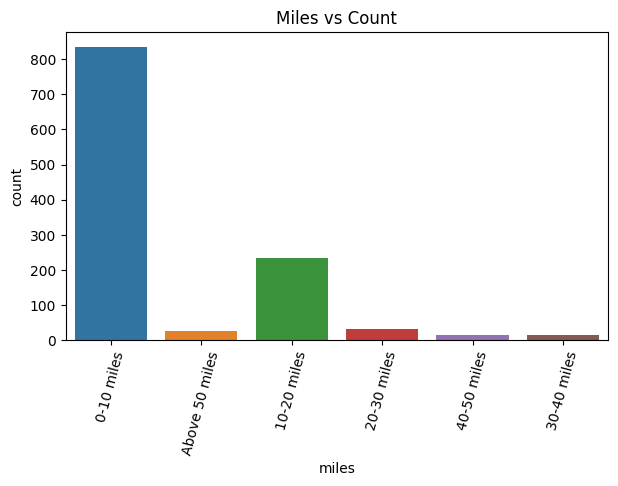

In [20]:
'create chart for miles count'
a,b= [],[]
for i,j in length_miles:
    a.append(i)
    b.append(j)
plt.figure(figsize=(7,4))
sns.barplot(x=a,y=b)
plt.xticks(rotation=75)
plt.xlabel('miles')
plt.ylabel('count')
plt.title('Miles vs Count')

In [21]:
'Now we want to know how many trips were made on Day time and how many on Night time '
time_border=pd.to_datetime(['18:00:00']).time

In [22]:
df['D/N']=df.apply(lambda x: 'Night Ride' if x['START_DATE'].time()>time_border else 'Day Ride',axis=1)

C:\Users\ANKUSH_NAIK\AppData\Local\Temp\ipykernel_8524\1566975369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['D/N']=df.apply(lambda x: 'Night Ride' if x['START_DATE'].time()>time_border else 'Day Ride',axis=1)


Text(0.5, 1.0, 'Day vs Night')

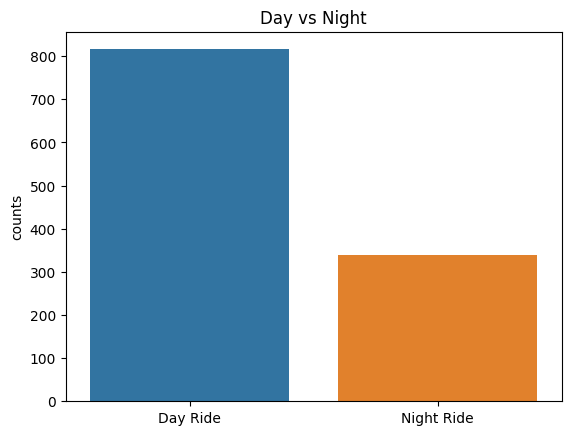

In [23]:
'Bar plot for total rides in day and night'
D_N_Label=df['D/N'].value_counts()
sns.barplot(x=D_N_Label.index,y=D_N_Label)
plt.ylabel('counts')
plt.title('Day vs Night')

Text(0, 0.5, 'Counts')

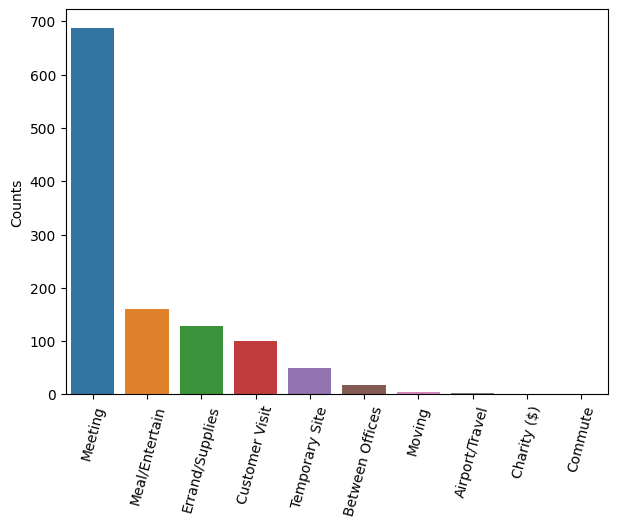

In [24]:
'Plot for Perpose '
Perp_l=df['PURPOSE'].value_counts()
plt.figure(figsize=(7,5))
plt.xticks(rotation=75);
sns.barplot(x=Perp_l.index,y=Perp_l)
plt.ylabel('Counts')

In [25]:
'we want to know in which month there is highest ride '
df['MONTH']=pd.DatetimeIndex(df['START_DATE']).month

C:\Users\ANKUSH_NAIK\AppData\Local\Temp\ipykernel_8524\2565633463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH']=pd.DatetimeIndex(df['START_DATE']).month


In [26]:
month_l={1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',5.0:'May',6.0:'Jun',7.0:'Jul',8.0:'Aug',9.0:'Sep',10.0:'Oct',11.0:'Nov',12.0:'Dec'}
df['MONTH']=df['MONTH'].map(month_l)
df

C:\Users\ANKUSH_NAIK\AppData\Local\Temp\ipykernel_8524\4018680087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH']=df['MONTH'].map(month_l)


,START_DATE,END_DATE,CATEGORY,START,DISTINATION,MILES,PURPOSE,D/N,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Night Ride,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,Day Ride,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Night Ride,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Day Ride,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Day Ride,Jan
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Day Ride,Dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Day Ride,Dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Day Ride,Dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Night Ride,Dec


In [27]:
month_cou=df['MONTH'].value_counts()
month_cou

Dec    146
Aug    133
Nov    122
Feb    115
Mar    113
Jul    112
Jun    107
Oct    106
Jan     61
Apr     54
May     49
Sep     36
Name: MONTH, dtype: int64

Text(0.5, 1.0, 'Month Rides')

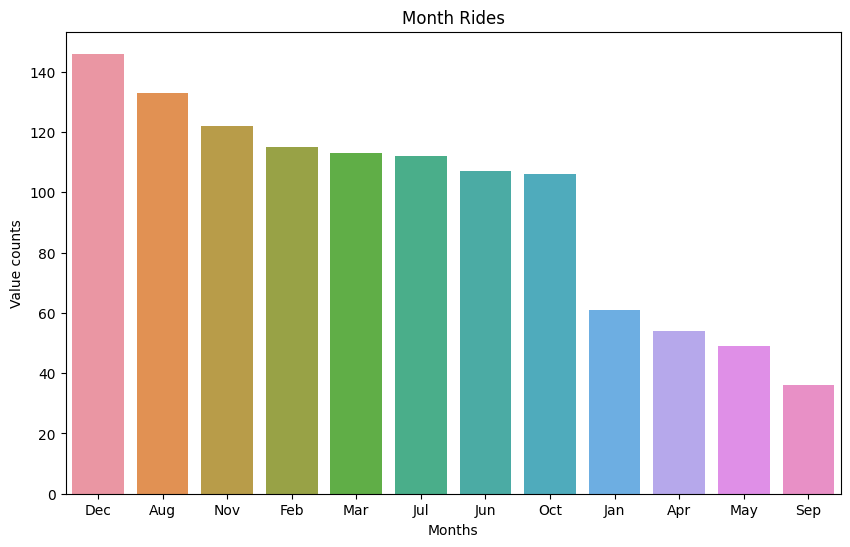

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=month_cou.index,y=month_cou)
plt.xlabel('Months')
plt.ylabel('Value counts')
plt.title('Month Rides')